# Notebooks et Ipython

## Généralités

- La couleur verte indique qu'on édite une cellule, la bleue qu'on édite le notebook
- Raccourcis dispos pour insérer des cellules etc (voir l'icône de clavier)
- Les cellules peuvent contenir des textes en markdown (m) ou du code (y). 
- Les cellules de code s'exécutent dans n'importe quel ordre. Les résultats sont globaux au Notebook. L'ordre d'exécution est visible à côté de la cellule.
- On exécute une cellule avec 
  - S-Entrée exécute et passe à la cellule suivante
  - C-Entrée exécute et reste sur la même cellule
  - Alt-Entrée exécute et insèce une nouvelle cellule
- Le résultat de la cellule est le résultat de la dernière ligne
- Vous pouvez tout recommencer en redémarrant le noyau (Menu Noyau)
- Si vous reprenez plus tard un notebook partiellement exécuté, il faut relancer les cellules déjà exécutées pour continuer (l'état est sauvegardé sans la mémoire).

In [26]:
1

1

In [27]:
1
2  # uniquement la sortie 2

2

In [28]:
def f(): pass # pas de sortie

In [29]:
print(1)
print(2) # pas de sortie

1
2


In [30]:
s = "Allo la terre ?" # pas de sortie

`<tab>` permet la complétion, et `?` donne de l'aide

In [31]:
# appuyer sur <tab> après ran
range 

range

In [32]:
# appuyer sur <tab> (2 fois) après le .
# s. (je l'ai fait 😊)

In [33]:
# Appuyer sur S-TAB à la fin de chaque ligne
s
range
s.split

<function str.split(sep=None, maxsplit=-1)>

In [34]:
range?

## Ipython et scripts

On peut inclure des scripts python dans un notebook. C'est la démarche classique pour le développement : scripts pour les algorithmes un peu complexes, utilisation d'un notebook pour utiliser et expérimenter, présenter. 

In [35]:
import algos

ModuleNotFoundError: No module named 'algos'

In [36]:
algos.run()

NameError: name 'algos' is not defined

In [37]:
algos.run?

Object `algos.run` not found.


In [38]:
algos.run??

Object `algos.run` not found.


## Magics!

Les *magics* permettent des opérations dans ipython. Ici on recharge automatiquement les scripts chargés quand ils sont modifiés. Voir [la doc](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html), et essayer en modifiant algos.py

In [39]:
algos.run()

NameError: name 'algos' is not defined

In [40]:
%load_ext autoreload
%autoreload 2

In [41]:
algos.run()

NameError: name 'algos' is not defined

On peut estimer la vitesse d'exécution d'un code... ou le profiler (voir le PDSH)

In [42]:
%timeit l = list(range(100000))

2.03 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
import numpy as np
%timeit l = np.arange(100000)

72.6 µs ± 2.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Listes et tableaux

**<span style='color: red'>Activité</span>** Voir le chapitre 02.01-Understanding-Data-Types du livre de Jake VanderPlas.

## Listes Python

- Les listes Python sont hétérogènes, non forcément continues en mémoire
- le type est `list`.
- un type est associé à une fonction de même type qui permet la conversion de type
- la fonction `range` est un énumérateur : permet d'énumérer des entiers
- les _list comprehensive_ sont une technique riche pour créer des listes
- les opérateurs + et * joignent (concatènent) des listes (car les listes sont hétérogènes et pas des tables de valeurs numériques)

Les listes sont écrites avec les crochets et les éléments séparés par des virgules

**Question** : Faire une liste nommée `l` contenant un entier, une chaîne de caractères, un nombre décimal. Afficher le type de `l`.

In [44]:
l = [24, 'abc', '3.14']
type(l)

list

La fonction `range` génère un **itérateur** qui permet de parcourir un ensemble. 

In [45]:
range(5)

range(0, 5)

**Question** : avec la conversion de type par la fonction `list` et avec la fonction `range`, faire une liste des entiers de 30 à 100 par pas de 5.

In [46]:
list(range(30, 105, 5))

[30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

Quelques exemples de *list_comprehensive* : 

In [47]:
[type(e) for e in l]

[int, str, str]

In [48]:
l2 = [[i, 2*j+i] for i in range (10) for j in range (2, 10, 2)]
l2

[[0, 4],
 [0, 8],
 [0, 12],
 [0, 16],
 [1, 5],
 [1, 9],
 [1, 13],
 [1, 17],
 [2, 6],
 [2, 10],
 [2, 14],
 [2, 18],
 [3, 7],
 [3, 11],
 [3, 15],
 [3, 19],
 [4, 8],
 [4, 12],
 [4, 16],
 [4, 20],
 [5, 9],
 [5, 13],
 [5, 17],
 [5, 21],
 [6, 10],
 [6, 14],
 [6, 18],
 [6, 22],
 [7, 11],
 [7, 15],
 [7, 19],
 [7, 23],
 [8, 12],
 [8, 16],
 [8, 20],
 [8, 24],
 [9, 13],
 [9, 17],
 [9, 21],
 [9, 25]]

In [49]:
['red' if t % 3 else 'blue' for t in range(10)]

['blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue']

**Question** : avec cette technique construire la sous-liste de `l2` dont la 2e composante est impaire. Rappel l'opérateur % calcule un modulo (reste par la division entière. (12 % 2 vaut 0) .

In [50]:
l2_odds_only = [e for e in l2 if e[1] % 2]
l2_odds_only

[[1, 5],
 [1, 9],
 [1, 13],
 [1, 17],
 [3, 7],
 [3, 11],
 [3, 15],
 [3, 19],
 [5, 9],
 [5, 13],
 [5, 17],
 [5, 21],
 [7, 11],
 [7, 15],
 [7, 19],
 [7, 23],
 [9, 13],
 [9, 17],
 [9, 21],
 [9, 25]]

**Question** : avec la technique des *list_comprehensive*, faire une liste de listes contenant les tables de multiplication pour tous les entiers de 1 à 10.

In [51]:
tables_de_multiplication = [[a, b, a*b] for a in range(1, 11) for b in range(1, 11)]
tables_de_multiplication

[[1, 1, 1],
 [1, 2, 2],
 [1, 3, 3],
 [1, 4, 4],
 [1, 5, 5],
 [1, 6, 6],
 [1, 7, 7],
 [1, 8, 8],
 [1, 9, 9],
 [1, 10, 10],
 [2, 1, 2],
 [2, 2, 4],
 [2, 3, 6],
 [2, 4, 8],
 [2, 5, 10],
 [2, 6, 12],
 [2, 7, 14],
 [2, 8, 16],
 [2, 9, 18],
 [2, 10, 20],
 [3, 1, 3],
 [3, 2, 6],
 [3, 3, 9],
 [3, 4, 12],
 [3, 5, 15],
 [3, 6, 18],
 [3, 7, 21],
 [3, 8, 24],
 [3, 9, 27],
 [3, 10, 30],
 [4, 1, 4],
 [4, 2, 8],
 [4, 3, 12],
 [4, 4, 16],
 [4, 5, 20],
 [4, 6, 24],
 [4, 7, 28],
 [4, 8, 32],
 [4, 9, 36],
 [4, 10, 40],
 [5, 1, 5],
 [5, 2, 10],
 [5, 3, 15],
 [5, 4, 20],
 [5, 5, 25],
 [5, 6, 30],
 [5, 7, 35],
 [5, 8, 40],
 [5, 9, 45],
 [5, 10, 50],
 [6, 1, 6],
 [6, 2, 12],
 [6, 3, 18],
 [6, 4, 24],
 [6, 5, 30],
 [6, 6, 36],
 [6, 7, 42],
 [6, 8, 48],
 [6, 9, 54],
 [6, 10, 60],
 [7, 1, 7],
 [7, 2, 14],
 [7, 3, 21],
 [7, 4, 28],
 [7, 5, 35],
 [7, 6, 42],
 [7, 7, 49],
 [7, 8, 56],
 [7, 9, 63],
 [7, 10, 70],
 [8, 1, 8],
 [8, 2, 16],
 [8, 3, 24],
 [8, 4, 32],
 [8, 5, 40],
 [8, 6, 48],
 [8, 7, 56],
 [8, 8, 64],
 

Observez le fonctionnement des opérateurs * et + sur les listes...

In [52]:
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [53]:
[1, 2] * 3

[1, 2, 1, 2, 1, 2]

Pour plus d'infos sur les listes, voir la doc Python, et l'aide sur les listes...

À l'aide des fonctions `dir` ou `help` regarder les méthodes (fonctions) qui s'appliquent aux listes. Essayez d'utiliser au moins deux méthodes.

In [54]:
dir(list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [55]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

## Les numpy arrays

Les `array`s de numpy sont homogènes (données toutes de même type), continues en mémoire, ce qui permet d'être très rapide (grâce à l'arithmétique sur les adresses mémoire).

In [56]:
import numpy as np

Je commence par fixer une graine pour la reproductibilité...

In [57]:
np.random.seed(42) 

In [58]:
ar1 = np.array([1.5, 4, 6])
ar1

array([1.5, 4. , 6. ])

**Question** Observez les dimensions de ce `array` à l'aide de `shape` et le type de contenu à l'aide de `dtype`.

In [59]:
ar1.shape

(3,)

In [60]:
ar1.dtype

dtype('float64')

On peut construire un `array` de numpy à partir de liste. Observez notamment la conversion de type appliquée pour obtenir un ensemble homogène.

In [61]:
np.array(l)

array(['24', 'abc', '3.14'], dtype='<U21')

In [62]:
ar2 = np.array(l2)
ar2

array([[ 0,  4],
       [ 0,  8],
       [ 0, 12],
       [ 0, 16],
       [ 1,  5],
       [ 1,  9],
       [ 1, 13],
       [ 1, 17],
       [ 2,  6],
       [ 2, 10],
       [ 2, 14],
       [ 2, 18],
       [ 3,  7],
       [ 3, 11],
       [ 3, 15],
       [ 3, 19],
       [ 4,  8],
       [ 4, 12],
       [ 4, 16],
       [ 4, 20],
       [ 5,  9],
       [ 5, 13],
       [ 5, 17],
       [ 5, 21],
       [ 6, 10],
       [ 6, 14],
       [ 6, 18],
       [ 6, 22],
       [ 7, 11],
       [ 7, 15],
       [ 7, 19],
       [ 7, 23],
       [ 8, 12],
       [ 8, 16],
       [ 8, 20],
       [ 8, 24],
       [ 9, 13],
       [ 9, 17],
       [ 9, 21],
       [ 9, 25]])

In [63]:
ar2.dtype

dtype('int64')

## Tranches, redimensionner, stacker, ...

**<span style='color: red'>Activité</span>** On lit le notebook 02.02-The-Basics-Of-NumPy-Arrays.

### Slicing ou tranches

En python les tranches font une copie de surface, en numpy il n'y a pas de copie. C'est très important pour la gestion de la mémoire avec les grands jeux de données.

In [64]:
l1 = [1.5, 4, 6]
sl1 = l1[0:2]
sl1

[1.5, 4]

In [65]:
ar1_sl1 = ar1[0:2]
ar1_sl1

array([1.5, 4. ])

In [66]:
ar1_sl1[0] = 12
sl1[0] = 12

In [67]:
ar1_sl1, sl1

(array([12.,  4.]), [12, 4])

In [68]:
ar1, l1

(array([12.,  4.,  6.]), [1.5, 4, 6])

Les accès aux indices sont plus simples en numpy! (moins de crochets)

In [69]:
print(ar2[0])  
print(ar2[:, 1]) 
print(ar2[0, 1])  

[0 4]
[ 4  8 12 16  5  9 13 17  6 10 14 18  7 11 15 19  8 12 16 20  9 13 17 21
 10 14 18 22 11 15 19 23 12 16 20 24 13 17 21 25]
4


## Copy

La copie d'une liste `list` est en surface, celle d'un numpy `array` c'est en profondeur...

In [70]:
ar2_copy = ar2.copy()
l2_copy = l2.copy()
type(ar2), type(l2)

(numpy.ndarray, list)

In [71]:
ar2_copy[0][0] = 12
l2_copy[0][0] = 12

In [72]:
ar2[0][0], l2[0][0]

(0, 12)

### Opérateurs * + / - ...

In [73]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [74]:
np.ones((4,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [75]:
np.eye(3) - np.ones((3,3))

array([[ 0., -1., -1.],
       [-1.,  0., -1.],
       [-1., -1.,  0.]])

In [76]:
np.eye(3) * np.ones((3,3)) 

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [77]:
3 * np.ones((3,3)) + 1

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

In [78]:
np.ones((3,3)) / (1+np.eye(3))

array([[0.5, 1. , 1. ],
       [1. , 0.5, 1. ],
       [1. , 1. , 0.5]])

### Redimensionnement

- `ravel` vue 1-D 
- `flatten` copie 1-D.
- `reshape` redimensionnement
- `transpose` transposition.
- `np.newaxis` ajout d'une dimension vide (parfois plus intéressant qu'un reshape).

In [79]:
ar2.ravel()

array([ 0,  4,  0,  8,  0, 12,  0, 16,  1,  5,  1,  9,  1, 13,  1, 17,  2,
        6,  2, 10,  2, 14,  2, 18,  3,  7,  3, 11,  3, 15,  3, 19,  4,  8,
        4, 12,  4, 16,  4, 20,  5,  9,  5, 13,  5, 17,  5, 21,  6, 10,  6,
       14,  6, 18,  6, 22,  7, 11,  7, 15,  7, 19,  7, 23,  8, 12,  8, 16,
        8, 20,  8, 24,  9, 13,  9, 17,  9, 21,  9, 25])

In [80]:
new_ar2 = ar2.flatten()
new_ar2

array([ 0,  4,  0,  8,  0, 12,  0, 16,  1,  5,  1,  9,  1, 13,  1, 17,  2,
        6,  2, 10,  2, 14,  2, 18,  3,  7,  3, 11,  3, 15,  3, 19,  4,  8,
        4, 12,  4, 16,  4, 20,  5,  9,  5, 13,  5, 17,  5, 21,  6, 10,  6,
       14,  6, 18,  6, 22,  7, 11,  7, 15,  7, 19,  7, 23,  8, 12,  8, 16,
        8, 20,  8, 24,  9, 13,  9, 17,  9, 21,  9, 25])

In [81]:
new_ar2.reshape((10,8))

array([[ 0,  4,  0,  8,  0, 12,  0, 16],
       [ 1,  5,  1,  9,  1, 13,  1, 17],
       [ 2,  6,  2, 10,  2, 14,  2, 18],
       [ 3,  7,  3, 11,  3, 15,  3, 19],
       [ 4,  8,  4, 12,  4, 16,  4, 20],
       [ 5,  9,  5, 13,  5, 17,  5, 21],
       [ 6, 10,  6, 14,  6, 18,  6, 22],
       [ 7, 11,  7, 15,  7, 19,  7, 23],
       [ 8, 12,  8, 16,  8, 20,  8, 24],
       [ 9, 13,  9, 17,  9, 21,  9, 25]])

In [82]:
new_ar2

array([ 0,  4,  0,  8,  0, 12,  0, 16,  1,  5,  1,  9,  1, 13,  1, 17,  2,
        6,  2, 10,  2, 14,  2, 18,  3,  7,  3, 11,  3, 15,  3, 19,  4,  8,
        4, 12,  4, 16,  4, 20,  5,  9,  5, 13,  5, 17,  5, 21,  6, 10,  6,
       14,  6, 18,  6, 22,  7, 11,  7, 15,  7, 19,  7, 23,  8, 12,  8, 16,
        8, 20,  8, 24,  9, 13,  9, 17,  9, 21,  9, 25])

In [83]:
new_ar2[np.newaxis,:]

array([[ 0,  4,  0,  8,  0, 12,  0, 16,  1,  5,  1,  9,  1, 13,  1, 17,
         2,  6,  2, 10,  2, 14,  2, 18,  3,  7,  3, 11,  3, 15,  3, 19,
         4,  8,  4, 12,  4, 16,  4, 20,  5,  9,  5, 13,  5, 17,  5, 21,
         6, 10,  6, 14,  6, 18,  6, 22,  7, 11,  7, 15,  7, 19,  7, 23,
         8, 12,  8, 16,  8, 20,  8, 24,  9, 13,  9, 17,  9, 21,  9, 25]])

In [84]:
new_ar2[:,np.newaxis]

array([[ 0],
       [ 4],
       [ 0],
       [ 8],
       [ 0],
       [12],
       [ 0],
       [16],
       [ 1],
       [ 5],
       [ 1],
       [ 9],
       [ 1],
       [13],
       [ 1],
       [17],
       [ 2],
       [ 6],
       [ 2],
       [10],
       [ 2],
       [14],
       [ 2],
       [18],
       [ 3],
       [ 7],
       [ 3],
       [11],
       [ 3],
       [15],
       [ 3],
       [19],
       [ 4],
       [ 8],
       [ 4],
       [12],
       [ 4],
       [16],
       [ 4],
       [20],
       [ 5],
       [ 9],
       [ 5],
       [13],
       [ 5],
       [17],
       [ 5],
       [21],
       [ 6],
       [10],
       [ 6],
       [14],
       [ 6],
       [18],
       [ 6],
       [22],
       [ 7],
       [11],
       [ 7],
       [15],
       [ 7],
       [19],
       [ 7],
       [23],
       [ 8],
       [12],
       [ 8],
       [16],
       [ 8],
       [20],
       [ 8],
       [24],
       [ 9],
       [13],
       [ 9],
       [17],
       [ 9],

In [85]:
print(new_ar2.shape)
new_ar2.reshape((-1,10))  # -1 est remplacé par la valeur qu'il faut!

(80,)


array([[ 0,  4,  0,  8,  0, 12,  0, 16,  1,  5],
       [ 1,  9,  1, 13,  1, 17,  2,  6,  2, 10],
       [ 2, 14,  2, 18,  3,  7,  3, 11,  3, 15],
       [ 3, 19,  4,  8,  4, 12,  4, 16,  4, 20],
       [ 5,  9,  5, 13,  5, 17,  5, 21,  6, 10],
       [ 6, 14,  6, 18,  6, 22,  7, 11,  7, 15],
       [ 7, 19,  7, 23,  8, 12,  8, 16,  8, 20],
       [ 8, 24,  9, 13,  9, 17,  9, 21,  9, 25]])

### Empiler des arrays

In [86]:
m1 = np.ones((3,1))
m2 = np.full((3,2), 2)

In [87]:
np.hstack((m1, m2))

array([[1., 2., 2.],
       [1., 2., 2.],
       [1., 2., 2.]])

In [88]:
np.vstack([m1.T, m2.T])

array([[1., 1., 1.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [89]:
np.concatenate((m1.T, m2.T))

array([[1., 1., 1.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [90]:
np.concatenate((m1, m2), axis=1)

array([[1., 2., 2.],
       [1., 2., 2.],
       [1., 2., 2.]])

In [91]:
np.c_[m1,m2]

array([[1., 2., 2.],
       [1., 2., 2.],
       [1., 2., 2.]])

In [92]:
np.r_[m1.T, m2.T]

array([[1., 1., 1.],
       [2., 2., 2.],
       [2., 2., 2.]])

### Agrégation

Les opérations `np.sum`, `np.max`, `np.min`, `np.std` fonctionnent par défaut sur la matrice à plat, mais on peut spécifier un axe.

In [93]:
np.sum(ar2)

760

In [94]:
np.sum(ar2, axis=0)

array([180, 580])

In [95]:
np.sum(ar2, axis=1)

array([ 4,  8, 12, 16,  6, 10, 14, 18,  8, 12, 16, 20, 10, 14, 18, 22, 12,
       16, 20, 24, 14, 18, 22, 26, 16, 20, 24, 28, 18, 22, 26, 30, 20, 24,
       28, 32, 22, 26, 30, 34])

###  Sélection

In [96]:
r1 = np.random.randint(1, 10, (4,3))
r1

array([[7, 4, 8],
       [5, 7, 3],
       [7, 8, 5],
       [4, 8, 8]])

In [97]:
r1<5

array([[False,  True, False],
       [False, False,  True],
       [False, False, False],
       [ True, False, False]])

In [98]:
r1[r1<5]

array([4, 3, 4])

In [99]:
np.where(r1<5,np.full((4,3),12), np.full((4,3),5))

array([[ 5, 12,  5],
       [ 5,  5, 12],
       [ 5,  5,  5],
       [12,  5,  5]])

## Fonctions importantes  et exercices
- arange
- zeros, ones
- eye
- linspace
- et dans le module `random`
   - randint
   - normal

**Question** Affichez l'aide sur `random.normal`, puis générer un ensemble de 100 valeurs de moyenne 0 et d'écart type 3. Appeler `s1` cet `array`.

In [100]:
np.random.normal?

In [101]:
s1 = np.random.normal(0, 3, 100)

**Question** Rechercher dans la documentation comment générer un échantillon de 1000 points en dimension 2 où chaque coordonnée est tirée selon une loi normale centrée en 0 et de variance 10 . (Il faut faire une matrice de 2 lignes, la première ligne contient les 1000 coordonnées pour la première dimension, la seconde ligne contient les 1000 coordonnées pour la seconde dimension)

In [102]:
s2 = np.random.normal(0, 10**0.5, (2, 1000))

**Question** Importer les modules nécessaires pour tracer un plot pour la fonction représentée par `s1`

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

**Question** : Tracer avec seaborn la distribution, (essayer plusieurs tracés, uniquement un histogramme, puis une estimation de la densité, essayez rugplot également,... soyez curieux!)

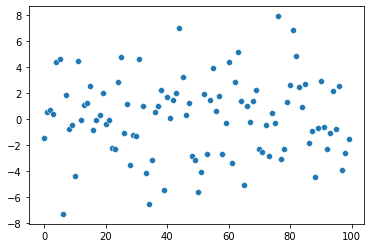

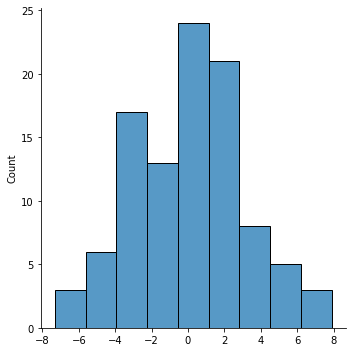

In [104]:
sns.scatterplot(x=np.arange(s1.size), y=s1)
sns.displot(s1, kind="hist")

<AxesSubplot:>

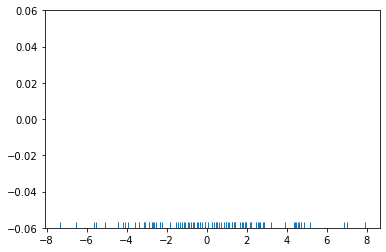

In [105]:
sns.rugplot(s1)

**Question** Tracer un scatter plot pour s2 avec pyplot et seaborn.

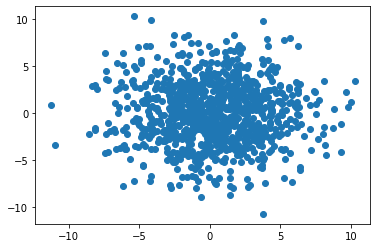

In [106]:
plt.scatter(s2[0], s2[1])

<AxesSubplot:>

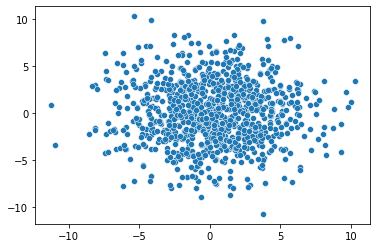

In [107]:
sns.scatterplot(x=s2[0], y=s2[1])

**Questions**

Générer les objets suivants nommés ex1, ex2, ex3 et ex4.

1. une matrice identité de dimension 5
2. un tenseur de 0 de dimensions 3x4x5
3. un vecteur d'entiers entre 4 et 100 de 3 en 3: 4, 7, 10, ....
4. un vecteur de 100 valeurs régulièrement espacées entre 5 et 8.

In [108]:
ex1 = np.eye(5)
ex2 = np.zeros((3, 4, 5))
ex3 = np.arange(4, 101, 3)
ex4 = np.linspace(5, 8, 100)


**Questions** 

Faire un jeu de données `X`, `y` tel que `X` contient 1000 points
   - 500 sont tirés comme précédemment selon une loi normale pour les 2 coordonnées centrée en 3, 3, variance 1
   - 500 sont tirés comme précédemment selon une loi normale pour les 2 coordonnées centrée en 0, 5, variance 1
   
et `y` (une étiquette) contient 1 pour les 500 premiers et -1 pour les autres. 

*Remarque* : vous pouvez utiliser des multivariées normales ou des normales... à vous de choisir! Les coordonnées sont indépendantes les unes des autres.


In [109]:
x1 = np.random.normal(3, 1, 500)

In [110]:
y1 = np.random.normal(3, 1, 500)

In [111]:
x2 = np.random.normal(0, 1, 500)

In [112]:
y2 = np.random.normal(5, 1, 500)

In [113]:
x = np.concatenate([x1, x2])

In [114]:
y = np.concatenate([y1, y2])

In [115]:
X = np.vstack([x, y])

In [116]:
y = np.concatenate([np.ones(500), np.full(500, -1)])

**Question** Tracer le nuage de points, l'option `c` de pyplot (`hue` de sns) permet de spécifier les couleurs que vous prenez selon `y`.

<AxesSubplot:>

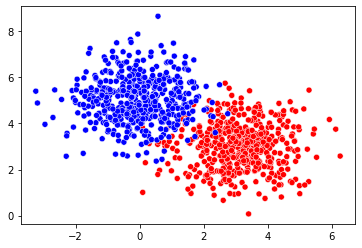

In [117]:
sns.scatterplot(x=X[0], y=X[1], c=["blue" if e == -1 else "red" for e in y])

**<span style='color: red'>Activité</span>** Regarder la documentation de la fonction `make_blobs` de `scikit-learn`!...

**Question** : recommencer avec cette fonction!

In [118]:
from sklearn.datasets import make_blobs

<AxesSubplot:>

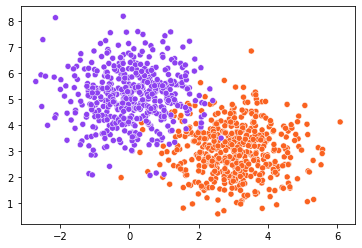

In [125]:
X2, y2 = make_blobs(n_samples=1000, centers=[(3, 3), (0, 5)],
                    random_state=42, shuffle=False)

sns.scatterplot(x=X2[:, 0], y=X2[:, 1 ],
               c=["#8D41F0" if e == -1 else "#FA6220" for e in y])